<a href="https://colab.research.google.com/github/Himansh-Shah/AudioClassification/blob/main/Project_One.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bird Classification on the basis of Audio

##Connecting to google drive
Google drive is cloud storage service which helps us to store and access data from remote storage devices

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Importing libraries


In [ ]:
!pip install resampy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 17.2 MB/s eta 0:00:00


In [ ]:
#Deep learning and machine learning modules
import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split



#Used to processs audio data
import librosa
import librosa.display
import resampy

#Helps us visualize data
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd


import os


#Importing data from google drive

In [ ]:

bird_df = pd.read_csv("/content/drive/MyDrive/Data/Audio_Classification/Birds Voice.csv")
bird_df.head()

common_name             scientific_name                 recordist_name  \
0  Common Ostrich  Struthio camelus australis                  Frank Lambert   
1  Common Ostrich            Struthio camelus                   Jeremy Hegge   
2  Common Ostrich            Struthio camelus                   Jeremy Hegge   
3  Common Ostrich            Struthio camelus                  Derek Solomon   
4  Common Ostrich            Struthio camelus  Morioka Zoological Park ZOOMO   

  recording_length        Date                                     TYPE  \
0             0:53  2019-10-30                                     call   
1             0:26  2014-11-20                                     call   
2             0:04  2014-11-21                                     call   
3             0:11  2010-02-09                                     call   
4             1:47  2021-09-06  voice during egg laying, zoo collection   

      xc_id   Time       Country                           Download_link  
0  XC516153  08:05  South Africa  https://xeno-canto.org/516153/download  
1  XC208209  04:00  South Africa  https://xeno-canto.org/208209/download  
2  XC208128  06:00  South Africa  https://xeno-canto.org/208128/download  
3   XC46725  07:00  South Africa   https://xeno-canto.org/46725/download  
4  XC675445  17:00         Japan  https://xeno-canto.org/675445/download

#Visualizing the dataset
We will try to plot differrent elements of our dataset in this section


In [ ]:
bird_df.columns

Index(['common_name', 'scientific_name', 'recordist_name', 'recording_length',
       'Date', 'TYPE', 'xc_id', 'Time', 'Country', 'Download_link'],
      dtype='object')

In [ ]:
filename = '/content/drive/MyDrive/Data/Audio_Classification/Voice of Birds/Voice of Birds/Brazilian Tinamou_sound/Brazilian Tinamou12.mp3'

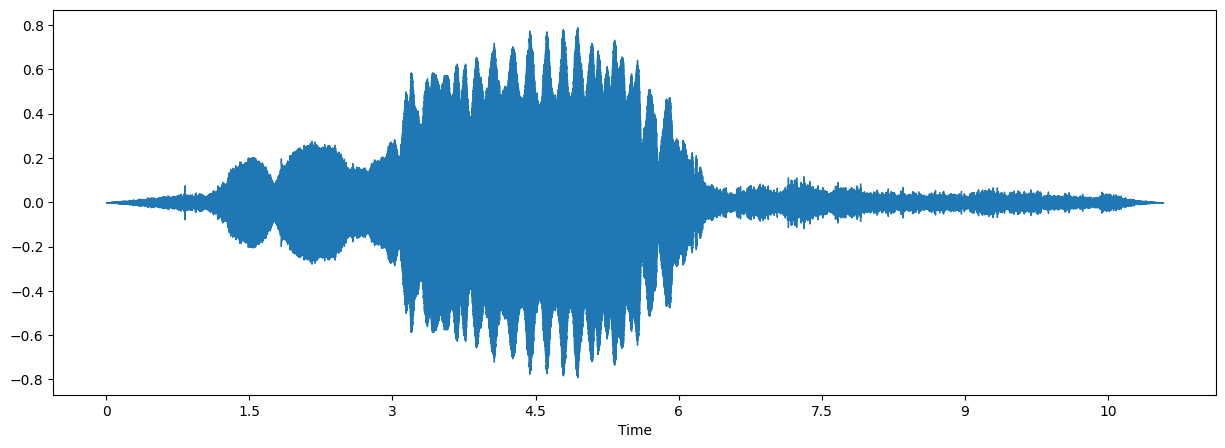

In [ ]:
plt.figure(figsize = (15,5))
audio , sample_rate = librosa.load(filename)
librosa.display.waveshow(audio, sr= sample_rate)
ipd.Audio(filename)

In [ ]:
audio

array([ 9.0949470e-12,  1.2732926e-11, -1.0913936e-11, ...,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32)

In [ ]:
mfccs = librosa.feature.mfcc(y=audio, sr =sample_rate)
mfccs

array([[-4.9812598e+02, -4.9812598e+02, -4.9258307e+02, ...,
        -4.9812598e+02, -4.9812598e+02, -4.9812598e+02],
       [ 0.0000000e+00,  0.0000000e+00,  4.9322948e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00, -2.4276379e-01, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [ 0.0000000e+00,  0.0000000e+00, -8.0056250e-01, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00, -1.4655676e-01, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  5.0961506e-01, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)

In [ ]:
bird_df.TYPE.unique()

array(['call', 'voice during egg laying, zoo collection', 'begging call',
       'song', 'alarm call', 'booming', '?', 'song, llamada reproductiva',
       nan,
       'call, morepork (or ruru or southern boobook) calls briefly near end female call., adul',
       'uncertain', 'call, morepork owl calls briefly', 'call, song',
       'duet, song', 'duet',
       'alarm call, aircraft noise just at the loudest part of the interaction',
       'alarm call, and the sound of the female walking through the vegetation, frog cal',
       'brush-turkeys scraping and scratching',
       'alarm call, microhylid frogs, raindrops',
       'alarm call, threat display of pet cassowary in enclosed pen., juve',
       'call, calls', 'drumming', 'call, drumming', 'begging call, call',
       'song, tremolo song', 'song, a single song', 'song, insectos',
       'call, long call', 'song, a single song.', 'song, , song b',
       'canto', 'call, song, subsong', 'subsong', 'song, short song',
       'call, 

In [ ]:
bird_df = bird_df.drop(['Date', 'recordist_name','recording_length', 'xc_id','Download_link','TYPE','Time'], axis=1)

bird_df.describe()


common_name   scientific_name Country
count               2161              2161    2161
unique               114               219      39
top     Plain Chachalaca  Tinamus guttatus  Brazil
freq                  30                30     594

In [ ]:
def features_extractor(file):
  audio, sample_rate = librosa.load(file, res_type='kaiser_fast')
  mfccs_feature = librosa.feature.mfcc(y=audio, sr = sample_rate, n_mfcc=40)
  mfccs_scaled_feature= np.mean(mfccs_feature.T, axis=0)

  return mfccs_scaled_feature


In [ ]:
mfcc = features_extractor(filename)
mfcc

array([-2.5444525e+02,  5.8502388e+01, -3.4284943e+01, -8.3689289e+00,
        5.9821859e-02,  3.2415672e+01,  1.8057966e+00, -2.7878315e+00,
       -1.4658853e+01,  1.8010684e+00, -3.4520862e+00,  5.8409472e+00,
       -1.2544530e+01,  7.3890557e+00, -6.4116726e+00,  6.0797286e+00,
       -4.4731660e+00, -5.2216969e+00, -5.8104515e+00,  9.8680925e-01,
        5.9397078e+00,  7.2963428e+00, -5.2651863e+00, -5.5382576e+00,
       -3.8774240e+00,  6.0799494e+00,  3.1315928e+00, -1.6201404e+00,
       -6.4881015e+00, -5.8837420e-01,  2.2727947e+00,  2.0331042e+00,
       -1.6635090e+00, -6.3282051e+00,  4.3234844e+00,  2.1099330e-01,
        7.3669419e+00, -3.7938397e+00, -4.1509161e+00,  4.5359784e-01],
      dtype=float32)

In [ ]:

species = os.listdir("/content/drive/MyDrive/Data/Audio_Classification/Voice of Birds/Voice of Birds")
species

['Andean Tinamou_sound',
 'Australian Brushturkey_sound',
 'Andean Guan_sound',
 'Band-tailed Guan_sound',
 'Barred Tinamou_sound',
 'Bartletts Tinamou_sound',
 'Baudo Guan_sound',
 'Bearded Guan_sound',
 'Berlepschs Tinamou_sound',
 'Biak Scrubfowl_sound',
 'Black Tinamou_sound',
 'Black-billed Brushturkey_sound',
 'Black-capped Tinamou_sound',
 'Black-fronted Piping Guan_sound',
 'Blue-throated Piping Guan_sound',
 'Brazilian Tinamou_sound',
 'Brown Tinamou_sound',
 'Brushland Tinamou_sound',
 'Buff-browed Chachalaca_sound',
 'Cauca Guan_sound',
 'Chaco Chachalaca_sound',
 'Chestnut-bellied Guan_sound',
 'Chestnut-headed Chachalaca_sound',
 'Chestnut-winged Chachalaca_sound',
 'Chilean Tinamou_sound',
 'Choco Tinamou_sound',
 'Cinereous Tinamou_sound',
 'Collared Brushturkey_sound',
 'Colombian Chachalaca_sound',
 'Common Ostrich_sound',
 'Crested Guan_sound',
 'Curve-billed Tinamou_sound',
 'Darwins Nothura_sound',
 'Dusky Megapode_sound',
 'Dusky-legged Guan_sound',
 'Dwarf Cassowa

In [ ]:
folder_path = "/content/drive/MyDrive/Data/Audio_Classification/Voice of Birds/Voice of Birds/"

In [ ]:
data_info=[]
for specie in species:
  data_info.append([specie, len(os.listdir(folder_path+specie))])

data_info_df = pd.DataFrame(data_info, columns=["Specie Name", "Count"])
data_info_df

Specie Name  Count
0            Andean Tinamou_sound     30
1    Australian Brushturkey_sound     28
2               Andean Guan_sound     30
3          Band-tailed Guan_sound     30
4            Barred Tinamou_sound      3
..                            ...    ...
109       White-browed Guan_sound      3
110      White-crested Guan_sound     12
111  White-throated Tinamou_sound     30
112       White-winged Guan_sound     20
113   Yellow-legged Tinamou_sound     30

[114 rows x 2 columns]

In [ ]:
# from datetime import datetime
# metadata = []

# start = datetime.now()
# for specie in species:
#   output = [0] * 114
#   output[species.index(specie)]=1
#   count=0
#   for items in os.listdir(folder_path + specie + "_sound"):
#     tensor = features_extractor(folder_path + specie + "_sound/" + items)
#     count= count+1
#     metadata.append([tensor , output])
#   print(specie, count)

# duration = datetime.now() - start
# duration

In [ ]:
import pickle

# Open the file in binary mode
with open('/content/drive/MyDrive/Data/Variable/converted_variable.pkl', 'rb') as file:

	# Call load method to deserialze
	myvar = pickle.load(file)



metadata = pickle.loads(myvar)

In [ ]:
metadata_df = pd.DataFrame(metadata, columns=["Tensor", "Labels"])
metadata_df

Tensor  \
0     [-292.25778, 79.14105, -69.43218, -15.776796, ...   
1     [-209.18692, 92.85317, -44.581, -2.5091066, -2...   
2     [-120.09011, 77.67051, -26.937946, 35.09762, -...   
3     [-154.5394, 73.99234, -63.638844, 4.540752, -2...   
4     [-206.09169, 76.77229, -47.625484, 38.417553, ...   
...                                                 ...   
2156  [-242.88806, 62.89085, -58.899864, 12.168685, ...   
2157  [-282.0615, 10.978386, -64.58603, -17.793783, ...   
2158  [-171.90819, 93.65975, -54.21476, -13.587225, ...   
2159  [-369.69077, 47.750366, -29.303461, 14.703401,...   
2160  [-234.54272, 15.991768, -64.94804, -10.695522,...   

                                                 Labels  
0     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
3     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
4     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
...                                                 ...  
2156  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2157  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2158  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2159  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2160  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  

[2161 rows x 2 columns]

In [ ]:
X = np.array(metadata_df['Tensor'].tolist())
y = np.array(metadata_df['Labels'].tolist())
X.shape , y.shape

((2161, 40), (2161, 114))

In [ ]:
X_train , X_test , y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

In [ ]:
X_train[11].shape , y_train[11].shape

((40,), (114,))

#Model Creation


In [ ]:
Output_shape = len(y_train[0])
Input_shape = X_train[1].shape
Input_shape , Output_shape

((40,), 114)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

def modelfitter(model, model_name , num_epochs=100, num_batch_size=32 ,verbo=1):
  start = datetime.now()
  checkpointer= ModelCheckpoint(filepath = f'/content/drive/MyDrive/Data/Models/Project One/Normalized data/{model_name}.hdf5',
                               verbose=verbo, save_best_only = True)
  history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer])
  duration = datetime.now() - start
  print("Training Completed in line ", duration)
  return history

In [ ]:
model_1 = tf.keras.Sequential([
    #First Layer
    tf.keras.layers.Dense(10, input_shape =Input_shape),

    #Final Layer
    tf.keras.layers.Dense(Output_shape, activation='softmax')

])

model_1.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD() ,metrics=['accuracy'])

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                410       
                                                                 
 dense_3 (Dense)             (None, 114)               1254      
                                                                 
Total params: 1664 (6.50 KB)
Trainable params: 1664 (6.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
modelfitter(model = model_1, model_name = "model_1")

Epoch 1/100
61/61 [==============================] - 5s 7ms/step - loss: 738439544798739184552903704576.0000 - accuracy: 0.0159 - val_loss: 151491432582345202834670486552576.0000 - val_accuracy: 0.0230
Epoch 2/100
61/61 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0165 - val_loss: nan - val_accuracy: 0.0046
Epoch 3/100
61/61 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0149 - val_loss: nan - val_accuracy: 0.0046
Epoch 4/100
61/61 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0149 - val_loss: nan - val_accuracy: 0.0046
Epoch 5/100
61/61 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0149 - val_loss: nan - val_accuracy: 0.0046
Epoch 6/100
61/61 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0149 - val_loss: nan - val_accuracy: 0.0046
Epoch 7/100
61/61 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0149 - val_loss: nan - val_accur

In [ ]:
model_2 = tf.keras.Sequential([
    #First Layer
    tf.keras.layers.Dense(100, input_shape = Input_shape),
    tf.keras.layers.Dropout(0.5),

    #Second Layers
    tf.keras.layers.Dense(200),
    tf.keras.layers.Dropout(0.5),

    #Finall Layers
    tf.keras.layers.Dense(Output_shape, activation="softmax")
])

model_2.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.SGD(), metrics=["accuracy"])

model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               4100      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               20200     
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_6 (Dense)             (None, 114)               22914     
                                                                 
Total params: 47214 (184.43 KB)
Trainable params: 47214 (184.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
modelfitter(model = model_2, model_name = "model_2")

Epoch 1/100
61/61 [==============================] - 2s 7ms/step - loss: nan - accuracy: 0.0149 - val_loss: nan - val_accuracy: 0.0046
Epoch 2/100
61/61 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0149 - val_loss: nan - val_accuracy: 0.0046
Epoch 3/100
61/61 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0149 - val_loss: nan - val_accuracy: 0.0046
Epoch 4/100
61/61 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0149 - val_loss: nan - val_accuracy: 0.0046
Epoch 5/100
61/61 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.0149 - val_loss: nan - val_accuracy: 0.0046
Epoch 6/100
61/61 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.0149 - val_loss: nan - val_accuracy: 0.0046
Epoch 7/100
61/61 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.0149 - val_loss: nan - val_accuracy: 0.0046
Epoch 8/100
61/61 [==============================] - 0s

In [ ]:
model_3 = tf.keras.Sequential([
    #First Layer
    tf.keras.layers.Dense(100, input_shape = Input_shape, activation="relu"),
    tf.keras.layers.Dropout(0.5),

    #Second Layers
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dropout(0.5),

    #Finall Layers
    tf.keras.layers.Dense(Output_shape, activation="softmax")
])

model_3.compile(loss = "categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(), metrics=["accuracy"])

model_3.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               4100      
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 200)               20200     
                                                                 
 dropout_5 (Dropout)         (None, 200)               0         
                                                                 
 dense_12 (Dense)            (None, 114)               22914     
                                                                 
Total params: 47214 (184.43 KB)
Trainable params: 47214 (184.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
modelfitter(model= model_3, model_name = "model_3")

Epoch 1/100
61/61 [==============================] - 1s 8ms/step - loss: 8.3012 - accuracy: 0.0077 - val_loss: 4.7533 - val_accuracy: 0.0092
Epoch 2/100
61/61 [==============================] - 0s 4ms/step - loss: 4.7612 - accuracy: 0.0118 - val_loss: 4.7473 - val_accuracy: 0.0092
Epoch 3/100
61/61 [==============================] - 0s 4ms/step - loss: 4.7390 - accuracy: 0.0098 - val_loss: 4.7447 - val_accuracy: 0.0092
Epoch 4/100
61/61 [==============================] - 0s 5ms/step - loss: 4.7353 - accuracy: 0.0113 - val_loss: 4.7377 - val_accuracy: 0.0092
Epoch 5/100
61/61 [==============================] - 0s 4ms/step - loss: 4.7332 - accuracy: 0.0108 - val_loss: 4.7350 - val_accuracy: 0.0092
Epoch 6/100
61/61 [==============================] - 0s 4ms/step - loss: 4.7217 - accuracy: 0.0149 - val_loss: 4.7301 - val_accuracy: 0.0092
Epoch 7/100
61/61 [==============================] - 0s 6ms/step - loss: 4.7233 - accuracy: 0.0165 - val_loss: 4.7228 - val_accuracy: 0.0092
Epoch 8/100
6

In [ ]:
model_4 = tf.keras.Sequential([
    #First Layer
    tf.keras.layers.Dense(100, input_shape = Input_shape, activation="relu"),
    tf.keras.layers.Dropout(0.5),

    #Second Layers
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dropout(0.5),

    #Finall Layers
    tf.keras.layers.Dense(Output_shape, activation="softmax")
])

model_4.compile(loss = "categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

model_4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 100)               4100      
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_14 (Dense)            (None, 200)               20200     
                                                                 
 dropout_7 (Dropout)         (None, 200)               0         
                                                                 
 dense_15 (Dense)            (None, 114)               22914     
                                                                 
Total params: 47214 (184.43 KB)
Trainable params: 47214 (184.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
modelfitter(model = model_4 , model_name="model_4")

Epoch 1/100
61/61 [==============================] - 2s 7ms/step - loss: 49.9779 - accuracy: 0.0093 - val_loss: 4.9963 - val_accuracy: 0.0000e+00
Epoch 2/100
61/61 [==============================] - 0s 4ms/step - loss: 11.9263 - accuracy: 0.0149 - val_loss: 4.7411 - val_accuracy: 0.0000e+00
Epoch 3/100
61/61 [==============================] - 0s 4ms/step - loss: 6.4603 - accuracy: 0.0170 - val_loss: 4.7284 - val_accuracy: 0.0000e+00
Epoch 4/100
61/61 [==============================] - 0s 4ms/step - loss: 5.4230 - accuracy: 0.0093 - val_loss: 4.7157 - val_accuracy: 0.0092
Epoch 5/100
61/61 [==============================] - 0s 4ms/step - loss: 5.1317 - accuracy: 0.0103 - val_loss: 4.7053 - val_accuracy: 0.0092
Epoch 6/100
61/61 [==============================] - 0s 4ms/step - loss: 4.9367 - accuracy: 0.0170 - val_loss: 4.6959 - val_accuracy: 0.0092
Epoch 7/100
61/61 [==============================] - 0s 5ms/step - loss: 4.8628 - accuracy: 0.0108 - val_loss: 4.6857 - val_accuracy: 0.0092

In [ ]:
model_5 = tf.keras.Sequential([
    #First Layer
    tf.keras.layers.Dense(1000, input_shape = Input_shape, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),

    #Second Layer
    tf.keras.layers.Dense(2000, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    #Third Layer
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    #Final Layer
    tf.keras.layers.Dense(Output_shape, activation='softmax')
])

model_5.compile(loss = "categorical_crossentropy",optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), metrics=["accuracy"])

model_5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 1000)              41000     
                                                                 
 dropout_8 (Dropout)         (None, 1000)              0         
                                                                 
 dense_17 (Dense)            (None, 2000)              2002000   
                                                                 
 dropout_9 (Dropout)         (None, 2000)              0         
                                                                 
 dense_18 (Dense)            (None, 1000)              2001000   
                                                                 
 dropout_10 (Dropout)        (None, 1000)              0         
                                                                 
 dense_19 (Dense)            (None, 114)              

In [ ]:
modelfitter(model=model_5, model_name = "model_5")

Epoch 1/100
61/61 [==============================] - 2s 8ms/step - loss: 24.0696 - accuracy: 0.0123 - val_loss: 4.7117 - val_accuracy: 0.0000e+00
Epoch 2/100
61/61 [==============================] - 0s 6ms/step - loss: 4.9728 - accuracy: 0.0170 - val_loss: 4.6575 - val_accuracy: 0.0092
Epoch 3/100
61/61 [==============================] - 0s 5ms/step - loss: 4.8186 - accuracy: 0.0108 - val_loss: 4.6142 - val_accuracy: 0.0092
Epoch 4/100
61/61 [==============================] - 0s 5ms/step - loss: 4.7380 - accuracy: 0.0144 - val_loss: 4.5855 - val_accuracy: 0.0092
Epoch 5/100
61/61 [==============================] - 0s 5ms/step - loss: 4.6925 - accuracy: 0.0108 - val_loss: 4.5693 - val_accuracy: 0.0092
Epoch 6/100
61/61 [==============================] - 0s 5ms/step - loss: 4.6572 - accuracy: 0.0113 - val_loss: 4.5542 - val_accuracy: 0.0092
Epoch 7/100
61/61 [==============================] - 0s 5ms/step - loss: 4.5759 - accuracy: 0.0144 - val_loss: 4.5509 - val_accuracy: 0.0092
Epoch 8/

In [ ]:
model_6 = tf.keras.Sequential([
    #First Layer
    tf.keras.layers.Dense(10000, input_shape = Input_shape, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),


    #Second Layer
    tf.keras.layers.Dense(20000, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    #Third Layer
    tf.keras.layers.Dense(5000, activation='relu'),
    tf.keras.layers.Dropout(0.5),


    tf.keras.layers.Dense(2000, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(1000, activation="relu"),
    tf.keras.layers.Dropout(0.5),

    #Final Layer
    tf.keras.layers.Dense(Output_shape, activation='softmax')
])

model_6.compile(loss="categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

model_6.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10000)             410000    
                                                                 
 dropout_11 (Dropout)        (None, 10000)             0         
                                                                 
 dense_21 (Dense)            (None, 20000)             200020000 
                                                                 
 dropout_12 (Dropout)        (None, 20000)             0         
                                                                 
 dense_22 (Dense)            (None, 5000)              100005000 
                                                                 
 dropout_13 (Dropout)        (None, 5000)              0         
                                                                 
 dense_23 (Dense)            (None, 2000)             

In [ ]:
modelfitter(model = model_6, model_name ="model6")

Epoch 1/100
61/61 [==============================] - 7s 89ms/step - loss: 35.8449 - accuracy: 0.0118 - val_loss: 4.6424 - val_accuracy: 0.0138
Epoch 2/100
61/61 [==============================] - 6s 99ms/step - loss: 4.6552 - accuracy: 0.0190 - val_loss: 4.5670 - val_accuracy: 0.0230
Epoch 3/100
61/61 [==============================] - 5s 85ms/step - loss: 4.5725 - accuracy: 0.0221 - val_loss: 4.4618 - val_accuracy: 0.0138
Epoch 4/100
61/61 [==============================] - 5s 84ms/step - loss: 4.5032 - accuracy: 0.0252 - val_loss: 4.4032 - val_accuracy: 0.0461
Epoch 5/100
61/61 [==============================] - 5s 87ms/step - loss: 4.4731 - accuracy: 0.0309 - val_loss: 4.3610 - val_accuracy: 0.0461
Epoch 6/100
61/61 [==============================] - 5s 84ms/step - loss: 4.3888 - accuracy: 0.0463 - val_loss: 4.2928 - val_accuracy: 0.0737
Epoch 7/100
61/61 [==============================] - 5s 84ms/step - loss: 4.3376 - accuracy: 0.0550 - val_loss: 4.2643 - val_accuracy: 0.0599
Epoch

In [ ]:
model_7  = tf.keras.Sequential([
    #First Layer
    tf.keras.layers.Dense(1000, input_shape= Input_shape ,activation="relu"),
    tf.keras.layers.Dropout(0.5),

    #Second Layer
    tf.keras.layers.Dense(2000, activation= "relu"),
    tf.keras.layers.Dropout(0.5),

    #Third Layers
    tf.keras.layers.Dense(1000, activation="relu"),
    tf.keras.layers.Dropout(0.5),

    #Fourth Layer
    tf.keras.layers.Dense(2000, activation="relu"),
    tf.keras.layers.Dropout(0.5),

    #Final Layer
    tf.keras.layers.Dense(Output_shape, activation='softmax')
])


model_7.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001) ,metrics=["accuracy"])

model_7.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 1000)              41000     
                                                                 
 dropout_16 (Dropout)        (None, 1000)              0         
                                                                 
 dense_27 (Dense)            (None, 2000)              2002000   
                                                                 
 dropout_17 (Dropout)        (None, 2000)              0         
                                                                 
 dense_28 (Dense)            (None, 1000)              2001000   
                                                                 
 dropout_18 (Dropout)        (None, 1000)              0         
                                                                 
 dense_29 (Dense)            (None, 2000)             

In [ ]:
modelfitter(model= model_7, model_name = "model_7", num_epochs=200)

Epoch 1/100
61/61 [==============================] - 0s 7ms/step - loss: 2.1202 - accuracy: 0.4871 - val_loss: 2.2817 - val_accuracy: 0.5484
Epoch 2/100
61/61 [==============================] - 0s 6ms/step - loss: 2.2485 - accuracy: 0.4882 - val_loss: 2.2359 - val_accuracy: 0.5161
Epoch 3/100
61/61 [==============================] - 0s 6ms/step - loss: 2.1749 - accuracy: 0.4743 - val_loss: 2.1674 - val_accuracy: 0.5438
Epoch 4/100
61/61 [==============================] - 0s 6ms/step - loss: 2.2041 - accuracy: 0.4810 - val_loss: 2.2605 - val_accuracy: 0.5115
Epoch 5/100
61/61 [==============================] - 0s 6ms/step - loss: 2.3105 - accuracy: 0.4599 - val_loss: 2.2120 - val_accuracy: 0.5300
Epoch 6/100
61/61 [==============================] - 0s 7ms/step - loss: 2.1751 - accuracy: 0.4954 - val_loss: 2.1392 - val_accuracy: 0.5714
Epoch 7/100
61/61 [==============================] - 0s 8ms/step - loss: 2.1970 - accuracy: 0.4810 - val_loss: 2.2771 - val_accuracy: 0.5668
Epoch 8/100
6

In [ ]:
model_8  = tf.keras.Sequential([
    #First Layer
    tf.keras.layers.Dense(1000, input_shape= Input_shape ,activation="relu"),
    tf.keras.layers.Dropout(0.5),

    #Second Layer
    tf.keras.layers.Dense(2000, activation= "relu"),
    tf.keras.layers.Dropout(0.5),

    #Third Layers
    tf.keras.layers.Dense(1000, activation="relu"),
    tf.keras.layers.Dropout(0.5),

    #Fourth Layer
    tf.keras.layers.Dense(2000, activation="relu"),
    tf.keras.layers.Dropout(0.5),

    #Fifth Layers
    tf.keras.layers.Dense(2500, activation="relu"),
    tf.keras.layers.Dropout(0.5),

    #Final Layer
    tf.keras.layers.Dense(Output_shape, activation='softmax')
])


model_8.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001) ,metrics=["accuracy"])

model_8.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 1000)              41000     
                                                                 
 dropout_20 (Dropout)        (None, 1000)              0         
                                                                 
 dense_32 (Dense)            (None, 2000)              2002000   
                                                                 
 dropout_21 (Dropout)        (None, 2000)              0         
                                                                 
 dense_33 (Dense)            (None, 1000)              2001000   
                                                                 
 dropout_22 (Dropout)        (None, 1000)              0         
                                                                 
 dense_34 (Dense)            (None, 2000)             

In [ ]:
modelfitter(model=model_8, model_name = "model_8")

Epoch 1/100
61/61 [==============================] - 2s 11ms/step - loss: 9.7417 - accuracy: 0.0123 - val_loss: 4.7007 - val_accuracy: 0.0092
Epoch 2/100
61/61 [==============================] - 0s 7ms/step - loss: 4.6994 - accuracy: 0.0154 - val_loss: 4.6626 - val_accuracy: 0.0046
Epoch 3/100
61/61 [==============================] - 0s 7ms/step - loss: 4.6743 - accuracy: 0.0144 - val_loss: 4.6359 - val_accuracy: 0.0230
Epoch 4/100
61/61 [==============================] - 0s 7ms/step - loss: 4.6244 - accuracy: 0.0154 - val_loss: 4.6717 - val_accuracy: 0.0138
Epoch 5/100
61/61 [==============================] - 0s 7ms/step - loss: 4.6383 - accuracy: 0.0113 - val_loss: 4.6180 - val_accuracy: 0.0184
Epoch 6/100
61/61 [==============================] - 0s 7ms/step - loss: 4.6104 - accuracy: 0.0159 - val_loss: 4.6183 - val_accuracy: 0.0138
Epoch 7/100
61/61 [==============================] - 0s 7ms/step - loss: 4.6209 - accuracy: 0.0129 - val_loss: 4.5977 - val_accuracy: 0.0276
Epoch 8/100


In [ ]:
model_x  = tf.keras.Sequential([
    #First Layer
    tf.keras.layers.Dense(1000, input_shape= Input_shape ,activation="relu"),
    tf.keras.layers.Dropout(0.5),

    #Second Layer
    tf.keras.layers.Dense(2000, activation= "relu"),
    tf.keras.layers.Dropout(0.5),

    #Third Layers
    tf.keras.layers.Dense(1000, activation="relu"),
    tf.keras.layers.Dropout(0.5),

    #Fourth Layer
    tf.keras.layers.Dense(2000, activation="relu"),
    tf.keras.layers.Dropout(0.5),

    #Final Layer
    tf.keras.layers.Dense(Output_shape, activation='softmax')
])


model_x.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-5) ,metrics=["accuracy"])

model_x.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 1000)              41000     
                                                                 
 dropout_29 (Dropout)        (None, 1000)              0         
                                                                 
 dense_43 (Dense)            (None, 2000)              2002000   
                                                                 
 dropout_30 (Dropout)        (None, 2000)              0         
                                                                 
 dense_44 (Dense)            (None, 1000)              2001000   
                                                                 
 dropout_31 (Dropout)        (None, 1000)              0         
                                                                 
 dense_45 (Dense)            (None, 2000)            

In [ ]:
lr_scheduler= tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-5 * 10 ** (epoch/20))
history = model_x.fit(X_train, y_train, epochs=150, verbose=0)
# modelfitter(model= model_x, model_name = "Model_X", verbose=0)

Text(0.5, 1.0, 'Learning vs Loss')

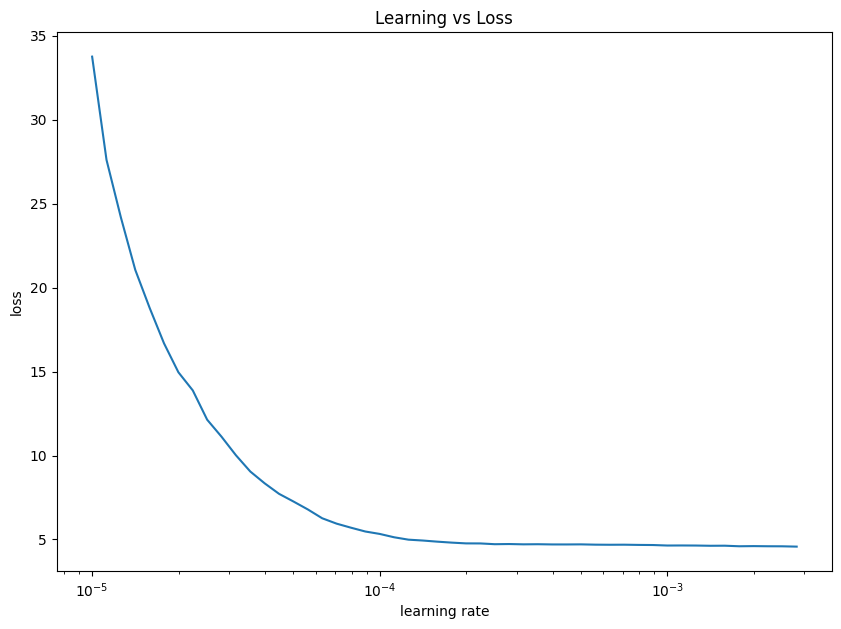

In [ ]:
lrs = 1e-5 * (10 ** (tf.range(50)/20))
plt.figure(figsize =(10,7))
plt.semilogx(lrs , history.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("Learning vs Loss")


In [ ]:
model_9  = tf.keras.Sequential([
    #First Layer
    tf.keras.layers.Dense(1000, input_shape= Input_shape ,activation="relu"),
    tf.keras.layers.Dropout(0.5),

    #Second Layer
    tf.keras.layers.Dense(2000, activation= "relu"),
    tf.keras.layers.Dropout(0.5),

    #Third Layers
    tf.keras.layers.Dense(1000, activation="relu"),
    tf.keras.layers.Dropout(0.5),

    #Fourth Layer
    tf.keras.layers.Dense(2000, activation="relu"),
    tf.keras.layers.Dropout(0.5),

    #Final Layer
    tf.keras.layers.Dense(Output_shape, activation='softmax')
])


model_9.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0008) ,metrics=["accuracy", "precision"])

model_9.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 1000)              41000     
                                                                 
 dropout_37 (Dropout)        (None, 1000)              0         
                                                                 
 dense_53 (Dense)            (None, 2000)              2002000   
                                                                 
 dropout_38 (Dropout)        (None, 2000)              0         
                                                                 
 dense_54 (Dense)            (None, 1000)              2001000   
                                                                 
 dropout_39 (Dropout)        (None, 1000)              0         
                                                                 
 dense_55 (Dense)            (None, 2000)            

In [ ]:
modelfitter(model = model_9, model_name="model_9_28-11", num_epochs=150)

Epoch 1/150
61/61 [==============================] - ETA: 0s - loss: 11.2867 - accuracy: 0.0129
Epoch 1: val_loss improved from inf to 4.71678, saving model to /content/drive/MyDrive/Data/Models/Project One/Normalized data/model_9_28-11.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


61/61 [==============================] - 3s 25ms/step - loss: 11.2867 - accuracy: 0.0129 - val_loss: 4.7168 - val_accuracy: 0.0184
Epoch 2/150
61/61 [==============================] - ETA: 0s - loss: 4.8126 - accuracy: 0.0113
Epoch 2: val_loss improved from 4.71678 to 4.71130, saving model to /content/drive/MyDrive/Data/Models/Project One/Normalized data/model_9_28-11.hdf5
61/61 [==============================] - 1s 16ms/step - loss: 4.8126 - accuracy: 0.0113 - val_loss: 4.7113 - val_accuracy: 0.0138
Epoch 3/150
55/61 [==========================>...] - ETA: 0s - loss: 4.7441 - accuracy: 0.0142
Epoch 3: val_loss did not improve from 4.71130
61/61 [==============================] - 0s 7ms/step - loss: 4.7406 - accuracy: 0.0139 - val_loss: 4.7162 - val_accuracy: 0.0276
Epoch 4/150
61/61 [==============================] - ETA: 0s - loss: 4.7074 - accuracy: 0.0185
Epoch 4: val_loss improved from 4.71130 to 4.70691, saving model to /content/drive/MyDrive/Data/Models/Project One/Normalized da

In [ ]:
model_10  = tf.keras.Sequential([
    #First Layer
    tf.keras.layers.Dense(1000, input_shape= Input_shape ,activation="relu"),
    tf.keras.layers.Dropout(0.5),

    #Second Layer
    tf.keras.layers.Dense(2000, activation= "relu"),
    tf.keras.layers.Dropout(0.5),

    #Third Layers
    tf.keras.layers.Dense(1000, activation="relu"),
    tf.keras.layers.Dropout(0.5),

    #Fourth Layer
    tf.keras.layers.Dense(2000, activation="relu"),
    tf.keras.layers.Dropout(0.5),

    #Final Layer
    tf.keras.layers.Dense(Output_shape, activation='softmax')
])



model_10.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0003) ,metrics=[tf.keras.metrics.Precision() , tf.keras.metrics.Recall(), "accuracy"])

model_10.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1000)              41000     
                                                                 
 dropout_4 (Dropout)         (None, 1000)              0         
                                                                 
 dense_6 (Dense)             (None, 2000)              2002000   
                                                                 
 dropout_5 (Dropout)         (None, 2000)              0         
                                                                 
 dense_7 (Dense)             (None, 1000)              2001000   
                                                                 
 dropout_6 (Dropout)         (None, 1000)              0         
                                                                 
 dense_8 (Dense)             (None, 2000)             

In [ ]:
history = model_10.fit(X_train, y_train, epochs=150, validation_data = (X_test, y_test))

Epoch 1/150
61/61 [==============================] - 3s 11ms/step - loss: 14.8498 - precision_1: 0.0124 - recall_1: 0.0072 - accuracy: 0.0118 - val_loss: 4.6862 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_accuracy: 0.0092
Epoch 2/150
61/61 [==============================] - 0s 7ms/step - loss: 6.0068 - precision_1: 0.0078 - recall_1: 5.1440e-04 - accuracy: 0.0123 - val_loss: 4.7216 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_accuracy: 0.0184
Epoch 3/150
61/61 [==============================] - 0s 7ms/step - loss: 5.1431 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - accuracy: 0.0170 - val_loss: 4.7264 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_accuracy: 0.0046
Epoch 4/150
61/61 [==============================] - 0s 7ms/step - loss: 4.9312 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - accuracy: 0.0108 - val_loss: 4.7343 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_accuracy: 0.0184
Epoch 5/150
61/61 [===

In [ ]:
history_df =pd.DataFrame(history.history)
history_df

loss  precision_1  recall_1  accuracy  val_loss  val_precision_1  \
0    14.849834     0.012411  0.007202  0.011831  4.686184         0.000000   
1     6.006800     0.007812  0.000514  0.012346  4.721621         0.000000   
2     5.143088     0.000000  0.000000  0.016975  4.726356         0.000000   
3     4.931222     0.000000  0.000000  0.010802  4.734278         0.000000   
4     4.761321     0.000000  0.000000  0.011831  4.733570         0.000000   
..         ...          ...       ...       ...       ...              ...   
145   0.489879     0.900855  0.813272  0.860082  2.101599         0.780749   
146   0.471577     0.899216  0.826132  0.870370  2.105874         0.796703   
147   0.488015     0.892595  0.812243  0.854938  2.077415         0.797814   
148   0.486453     0.896317  0.813786  0.859568  2.069805         0.757895   
149   0.488403     0.896205  0.826132  0.862140  2.095890         0.780749   

     val_recall_1  val_accuracy  
0        0.000000      0.009217  
1        0.000000      0.018433  
2        0.000000      0.004608  
3        0.000000      0.018433  
4        0.000000      0.018433  
..            ...           ...  
145      0.672811      0.705069  
146      0.668203      0.705069  
147      0.672811      0.700461  
148      0.663594      0.691244  
149      0.672811      0.695853  

[150 rows x 8 columns]

Text(0.5, 1.0, 'Validation data Loss/Precision vs epochs')

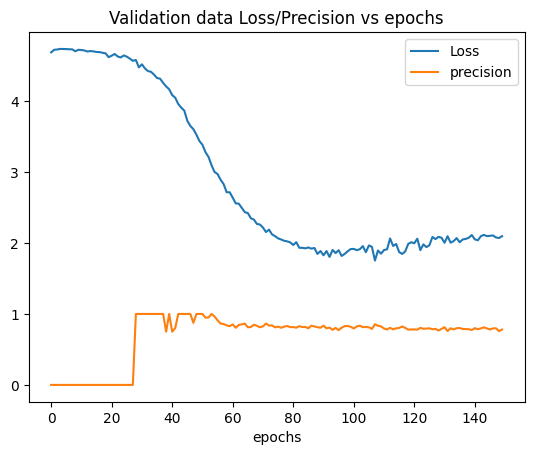

In [ ]:
# plt.figure(figsize=(10, 10))
plt.plot(history_df["val_loss"], label="Loss")
plt.plot(history_df["val_precision_1"], label="precision")
plt.xlabel("epochs")
plt.legend()
plt.title("Validation data Loss/Precision vs epochs")


Text(0.5, 1.0, 'Validation data Loss/Accuracy vs epochs')

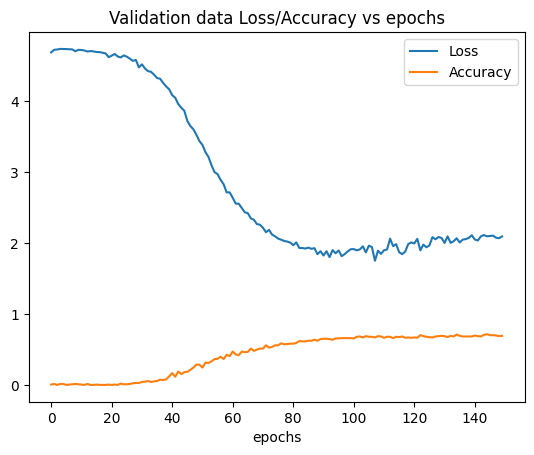

In [ ]:
plt.plot(history_df["val_loss"], label="Loss")
plt.plot(history_df["val_accuracy"], label="Accuracy")
plt.xlabel("epochs")
plt.legend()
plt.title("Validation data Loss/Accuracy vs epochs")


Text(0.5, 1.0, 'Validation data Loss/recall vs epochs')

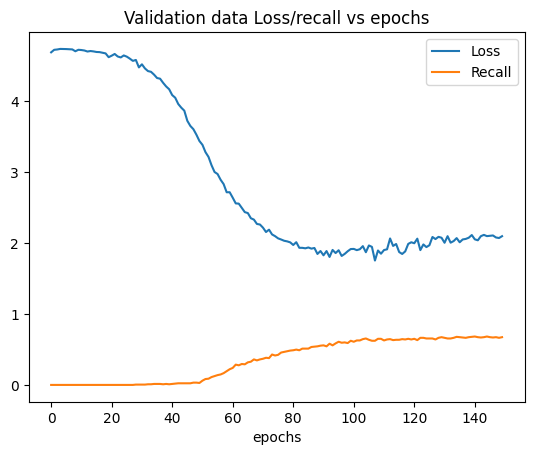

In [ ]:
plt.plot(history_df["val_loss"], label="Loss")
plt.plot(history_df["val_recall_1"], label="Recall")
plt.xlabel("epochs")
plt.legend()
plt.title("Validation data Loss/recall vs epochs")


In [ ]:
history = modelfitter(model=model_10 , model_name="model_12_28-11", num_epochs=150)

Epoch 1/150
61/61 [==============================] - ETA: 0s - loss: 15.5470 - precision_2: 0.0141 - recall_2: 0.0082 - accuracy: 0.0154
Epoch 1: val_loss improved from inf to 4.67020, saving model to /content/drive/MyDrive/Data/Models/Project One/Normalized data/model_12_28-11.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


61/61 [==============================] - 10s 137ms/step - loss: 15.5470 - precision_2: 0.0141 - recall_2: 0.0082 - accuracy: 0.0154 - val_loss: 4.6702 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - val_accuracy: 0.0184
Epoch 2/150
61/61 [==============================] - ETA: 0s - loss: 6.1473 - precision_2: 0.0213 - recall_2: 0.0015 - accuracy: 0.0139
Epoch 2: val_loss did not improve from 4.67020
61/61 [==============================] - 7s 108ms/step - loss: 6.1473 - precision_2: 0.0213 - recall_2: 0.0015 - accuracy: 0.0139 - val_loss: 4.6823 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - val_accuracy: 0.0092
Epoch 3/150
61/61 [==============================] - ETA: 0s - loss: 5.2249 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - accuracy: 0.0103
Epoch 3: val_loss did not improve from 4.67020
61/61 [==============================] - 6s 97ms/step - loss: 5.2249 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - accuracy: 0.0103 - val_loss: 4.7339 - val_prec

In [ ]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 39ms/step - loss: 2.0775 - precision_2: 0.7906 - recall_2: 0.6959 - accuracy: 0.7143


[2.077479839324951, 0.7905759215354919, 0.695852518081665, 0.7142857313156128]

Text(0.5, 1.0, 'Training of Final Model')

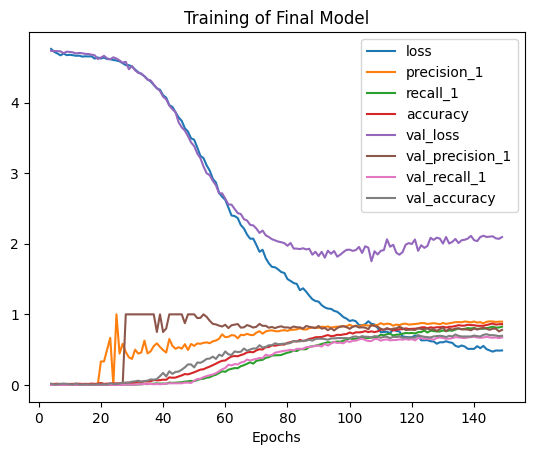

In [ ]:
pd.DataFrame(history.history).drop([0,1,2,3], axis=0).plot()
plt.xlabel("Epochs")
plt.title("Training of Final Model")


In [ ]:
modelfitter(model=model_10 , model_name="model_11_28-11", num_epochs=50)

Epoch 1/50
61/61 [==============================] - ETA: 0s - loss: 0.9641 - accuracy: 0.7274 - precision: 0.8386
Epoch 1: val_loss improved from inf to 1.96746, saving model to /content/drive/MyDrive/Data/Models/Project One/Normalized data/model_11_28-11.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


61/61 [==============================] - 7s 115ms/step - loss: 0.9641 - accuracy: 0.7274 - precision: 0.8386 - val_loss: 1.9675 - val_accuracy: 0.6728 - val_precision: 0.7556
Epoch 2/50
61/61 [==============================] - ETA: 0s - loss: 0.9425 - accuracy: 0.7428 - precision: 0.8415
Epoch 2: val_loss did not improve from 1.96746
61/61 [==============================] - 7s 115ms/step - loss: 0.9425 - accuracy: 0.7428 - precision: 0.8415 - val_loss: 1.9958 - val_accuracy: 0.6452 - val_precision: 0.7733
Epoch 3/50
61/61 [==============================] - ETA: 0s - loss: 0.8956 - accuracy: 0.7469 - precision: 0.8356
Epoch 3: val_loss improved from 1.96746 to 1.94175, saving model to /content/drive/MyDrive/Data/Models/Project One/Normalized data/model_11_28-11.hdf5
61/61 [==============================] - 8s 129ms/step - loss: 0.8956 - accuracy: 0.7469 - precision: 0.8356 - val_loss: 1.9418 - val_accuracy: 0.6636 - val_precision: 0.7975
Epoch 4/50
61/61 [==============================]

## Evaluation of the models


In [ ]:
import itertools
from sklearn.metrics import confusion_matrix




def make_confusion_matrix(y_true, y_preds, classes= None , figsize = (20, 20), text_size =15):

  cm = confusion_matrix(y_true, y_preds)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]


  fig , ax = plt.subplots(figsize = figsize)
  cax = ax.matshow(cm_norm, cmap = plt.cm.Blues)
  fig.colorbar(cax)


  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title="Confusion Matrix",
        xlabel ="Predicted Label",
        ylabel="True Label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ax.yaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  threshold =(cm.max() + cm.min())/2

  for i ,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i ,j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i,j]>threshold else "black",
           size=text_size)

In [ ]:
y_preds = model_10.predict(X_test)

7/7 [==============================] - 0s 23ms/step


In [ ]:
y_preds = y_preds.argmax(axis=1)


In [ ]:
y_preds[:10]

array([ 36,  84,  30,  55, 112,  92,  37,  46,  49,  86])

In [ ]:
y_transformed_test = y_test.argmax(axis=1)

In [ ]:
y_transformed_test[:10]

array([ 36,  84,  45,  55, 112,  92,  37,  46,  49,  99])

In [ ]:
make_confusion_matrix(y_preds , y_transformed_test, figsize=(150, 150), text_size=5)

<ipython-input-40-8c6152a042f8>:10: RuntimeWarning: invalid value encountered in divide
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


In [ ]:
model  = tf.keras.models.load_model("/content/drive/MyDrive/Data/Models/Project One/Normalized data/model_10_28-11.hdf5")

In [ ]:
metadata = []
for items in os.listdir("/content/drive/MyDrive/Data/Audio_Classification/Voice of Birds/Voice of Birds"):
  metadata.append([items , len(os.listdir("/content/drive/MyDrive/Data/Audio_Classification/Voice of Birds/Voice of Birds/"+items))])

In [ ]:
metadata_df = pd.DataFrame(metadata, columns=["Specie", "Count"])
metadata_df

Specie  Count
0            Andean Tinamou_sound     30
1    Australian Brushturkey_sound     28
2               Andean Guan_sound     30
3          Band-tailed Guan_sound     30
4            Barred Tinamou_sound      3
..                            ...    ...
109       White-browed Guan_sound      3
110      White-crested Guan_sound     12
111  White-throated Tinamou_sound     30
112       White-winged Guan_sound     20
113   Yellow-legged Tinamou_sound     30

[114 rows x 2 columns]

In [ ]:
top_15 = metadata_df.sort_values(by=['Count'], ascending=False)

In [ ]:
plt.figure(figsize = (300, 100))
plt.plot(metadata_df["Specie"], metadata_df["Count"])
plt.xticks(rotation=90, fontsize=7)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113],
 [Text(0, 0, 'Andean Tinamou_sound'),
  Text(1, 0, 'Australian Brushturkey_sound'),
  Text(2, 0, 'Andean Guan_sound'),
  Text(3, 0, 'Band-tailed Guan_sound'),
  Text(4, 0, 'Barred Tinamou_sound'),
  Text(5, 0, 'Bartletts Tinamou_sound'),
  Text(6, 0, 'Baudo Guan_sound'),
  Text(7, 0, 'Bearded Guan_sound'),
  T